In [1]:
import collectionOsm as osm
import osmDownload as osmD


# Generate geometry

Generate geometry to be pass to the lib.

In [2]:
# import libraries
import requests
import geopandas as gpd
import shapely.wkb

In [3]:
"""queryUrl = 'https://api.resourcewatch.org/v1/query/Politcial-Boundaries-GADM-adminitrative-level-1-1490086842541'
#queryParams = {'sql': "select the_geom, name_1 from gadm28_adm1 where iso='USA'"}
queryParams = {'sql': "select * from gadm28_adm1 where name_1='New York'"}
resp = requests.get(queryUrl, queryParams)
"""

'queryUrl = \'https://api.resourcewatch.org/v1/query/Politcial-Boundaries-GADM-adminitrative-level-1-1490086842541\'\n#queryParams = {\'sql\': "select the_geom, name_1 from gadm28_adm1 where iso=\'USA\'"}\nqueryParams = {\'sql\': "select * from gadm28_adm1 where name_1=\'New York\'"}\nresp = requests.get(queryUrl, queryParams)\n'

In [4]:
queryUrl = 'https://api.resourcewatch.org/v1/query/Politcial-Boundaries-GADM-adminitrative-level-1-1490086842541'
#queryParams = {'sql': "select the_geom, name_1 from gadm28_adm1 where iso='USA'"}
queryParams = {'sql': "select * from gadm28_adm1 where name_1='Galicia'"}
resp = requests.get(queryUrl, queryParams)
data = resp.json()['data']

In [5]:
for el in data:
    geometry =  shapely.wkb.loads(el['the_geom'], hex=True)
    name = el['name_1']
    el['geometry']=geometry

In [6]:
gdf = gpd.GeoDataFrame(data)
gdf.head()

,cartodb_id,the_geom,the_geom_webmercator,objectid,id_0,iso,name_0,id_1,name_1,hasc_1,...,varname_1,shape_leng,shape_area,bbox,centroid,area_ha,topojson,the_geom_simple,geojson,geometry
0,2859,0106000020E61000002A00000001030000000100000005...,0106000020110F00002A00000001030000000100000005...,2859,215,ESP,Spain,12,Galicia,ES.GA,...,Galice|Gal¡cia|Galicien|Galiza|Galizia,26.55111,3.255741,"{""type"":""Polygon"",""coordinates"":[[[-9.30125045...","{""type"":""Point"",""coordinates"":[-7.911230406478...",2.960560e+06,None,0106000020E6100000010000000103000000010000004E...,"{""type"":""MultiPolygon"",""coordinates"":[[[[-8.86...","MULTIPOLYGON (((-8.86292 42.14764, -8.86292 42..."


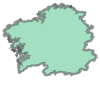

In [7]:
#WE'RE GOING TO WORK WITH THE GEOMETRY OF THE ESTATE OF NEW YORK 
geometry = gdf['geometry'][0]
geometry

# Test library

In [8]:
osmC = osm.CollectionOsm(geometry=geometry, zoom=5, crs=None, geom_tiles=True)

/home/jovyan/work/test_dev/osmUtils/osmUtils/utils_geo.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manifest['exclude'] = 0
/home/jovyan/work/test_dev/osmUtils/osmUtils/utils_geo.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manifest['exported'] = 0
/home/jovyan/work/test_dev/osmUtils/osmUtils/utils_geo.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [9]:
manifest = osmC.get_manifest()
manifest.head()

/home/jovyan/work/test_dev/osmUtils/osmUtils/utils_geo.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manifest['exclude'] = 0
/home/jovyan/work/test_dev/osmUtils/osmUtils/utils_geo.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manifest['exported'] = 0
/home/jovyan/work/test_dev/osmUtils/osmUtils/utils_geo.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,id,geometry,exclude,exported,uploaded
491,5_15_11,"POLYGON ((-11.25000 40.97990, -11.25000 48.922...",0,0,0


In [10]:
len(manifest)

1

In [ ]:
##retrieve osm data using the osmDownload
retrieved_data = osmD.OsmDownload(manifest, osm_type='all_roads', infrastructure='way["highway"]', custom_filter=None, output_path=None)
retrieved_data

Tiles to process: (1, 1)
0.0%

Fetching OSM for 5/15/11

Pausing 1 seconds before making API POST request
Posting to http://overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"40.979898 -11.250000 48.922499 -11.250000 48.922499 0.000000 40.979898 0.000000 40.979898 -11.250000");>;);out;'}"


In [15]:
retrieved_data.osmData

,id,geometry,exclude,exported,uploaded
491,5_15_11,"POLYGON ((-11.25000 40.97990, -11.25000 48.922...",1,0,0


## Prototype getOsm:

In [14]:
tiles_to_process = manifest[manifest.exclude == 0]

#once all the tiles have been processed the tiles_to_process will be 0
len(tiles_to_process), len(manifest)

(1, 1)

In [15]:
def generate_filter(osm_type):
    """
    Create a filter to retrieve osm data
    
    Parameters
    ----------
    osm_type: string
        {'all_roads'}
    Returns
    -------
    string
    """
    filters = dict()
    filters['all_roads'] = (
        '[!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|' \
        'elevator|escalator|proposed|bridleway|abandoned|platform"]'
    )
    #todo: add more filters
    if osm_type in filters:
        osm_filter = filters[osm_type]
    else:
        raise ValueError(f'Unrecognised filter type: {osm_type}')
    return osm_filter
    

In [16]:
get_filter(osm_type='all_roads')

'[!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"]'

In [17]:
#def get_infrastructure(osm_type):
#    """
#    Create a infrastructure type to retrieve osm data
#    
#    Parameters
#    ----------
#    osm_type: string
#        {'all_roads'}
#    Returns
#    -------
#    infrastructure_type: string
#    """
#    infrastructure = dict()
#    infrastructure['all_roads']=(
#        'way["highway"]'
#    )
#    ## todo: add more infrastructure type for additional filters
#    
#    if osm_type in infrastructure:
#        osm_infrastructure = infrastructure[osm_type]
#    else:
#        raise ValueError(f'Unrecognised infrastructure type for {osm_type} filter type')
#    return osm_infrastructure
#    
#    This has been generated by the overpass-turbo wizard.
#The original search was:
#“park”
#*/
#[out:json][timeout:25];
#// gather results
#(
#  // query part for: “park”
#  node["leisure"="park"](42.39750612265301,-8.851203918457031,42.470254809863164,-8.76983642578125);
#  way["leisure"="park"](42.39750612265301,-8.851203918457031,42.470254809863164,-8.76983642578125);
#  relation["leisure"="park"](42.39750612265301,-8.851203918457031,42.470254809863164,-8.76983642578125);
#);
#// print results
#out body;
#>;
#out skel qt;

In [19]:
def get_coordinate_string(geometry):
    """
    Extract exterior coordinates from polygon(s) to pass to OSM in a query by
    polygon. Ignore the interior ("holes") coordinates. Round to 6 places.
    """
    x, y = geometry.exterior.xy
    coords = list(zip(x, y))
    return ' '.join([f'{xy[1]:.6f} {xy[0]:.6f}' for xy in coords])

In [20]:
def get_pause_duration(
    default_duration=5, 
    overpass_endpoint='http://overpass-api.de/api'
):
    """
    Check the Overpass API status endpoint to determine how long to wait until
    next slot is available.
    """
    try:
        url = overpass_endpoint.rstrip('/') + '/status'
        response = requests.get(url)#, headers=_get_http_headers())
        status = response.text.split('\n')[3]
        status_first_token = status.split(' ')[0]
    # if we cannot reach the status endpoint or parse its output, log an
    # error and return default duration
    except:
        print(f'Unable to query {url}')
        return default_duration
    try:
        # if first token is numeric, it's how many slots you have available - no
        # wait required
        available_slots = int(status_first_token)
        pause_duration = 0
    except:
        # if first token is 'Slot', it tells you when your slot will be free
        if status_first_token == 'Slot':
            utc_time_str = status.split(' ')[3]
            utc_time = dt.datetime.strptime(utc_time_str,'%Y-%m-%dT%H:%M:%SZ,')
            pause_duration = int((utc_time - dt.datetime.utcnow()).total_seconds() + 1)
            pause_duration = max(pause_duration, 1)

        # if first token is 'Currently', it is currently running a query
        elif status_first_token == 'Currently':
            time.sleep(default_duration)
            pause_duration = get_pause_duration()
        else:
            print(f'Unrecognized server status: "{status}"')
            return default_duration

In [21]:
def overpass_request(
    query_string, 
    pause_duration=1, 
    timeout=180,
    overpass_endpoint='http://overpass-api.de/api'
):
    """
    Send a request to the Overpass API via HTTP POST and return the JSON
    response.
    Parameters
    ----------
    query_string : str
        Overpass API query string
    pause_duration : int
        how long to pause in seconds before requests, if None, will query API
        status endpoint to find when next slot is available
    timeout : int
        the timeout interval for the requests library
    Returns
    -------
    dict
    """
    url = overpass_endpoint.rstrip('/') + '/interpreter'

    # Check server status first and wait if overloaded
    if pause_duration is None:
        pause_duration = get_pause_duration()
    print(f'Pausing {pause_duration} seconds before making API POST request')
    time.sleep(pause_duration)

    # Post request
    data = {'data': query_string}
    print(f'Posting to {url} with timeout={timeout}, "{data}"')
    response = requests.post(url, data={'data': query_string}, timeout=timeout)

    try:
        response_json = response.json()
        if 'remark' in response_json:
            print(f'Server remark: "{response_json["remark"]}"')

    except:
        if response.status_code in [429, 504]:
            error_pause_duration = get_pause_duration()
            print(f'Server returned status {response.status_code} and no JSON data: retrying in {error_pause_duration} seconds.')
            time.sleep(error_pause_duration)
            response_json = overpass_request(query_string, pause_duration=pause_duration, timeout=timeout)
        # else, this was an unhandled status_code, throw an exception
        else:
            print(f'Server returned status code {response.status_code} and no JSON data.')
            print(f'Server returned no JSON data\n{response} {response.reason}\n{response.text}')
            

    return response_json

In [22]:
def download_OSM(
    polygon,
    infrastructure='way["highway"]',
    filters='',
    timeout=180,
    overpass_endpoint='http://overpass-api.de/api'
):
    """
    Query Overpass API and parse response to a list of LineString(s)
    """
    polygon_coord_str = get_coordinate_string(polygon)
    overpass_settings = f'[out:json][timeout:{timeout}]'
    
    # Query string in Overpass QL
    # Essetially look for everything that matches 
    #  `infrastructure` and `filters`
    #  within `poly`
    #  selecting children with `>`
    query_str = f'{overpass_settings};({infrastructure}{filters}(poly:"{polygon_coord_str}");>;);out;'
    try:
        
        response_json = overpass_request(
            query_str, 
            timeout=timeout, 
            overpass_endpoint=overpass_endpoint
        )
    except:
        
        response_json = None
    return response_json

In [ ]:
def retrieve_osmData(manifest, osm_filter, path):
    """
    Download OSM ways and nodes within a given geometry from the Overpass API.
    
    Parameters
    ----------
    manifest: geopandas.GeoDataFrame
            manifest geodataframe.
    osm_type: string
        type of filter to retieve if custom_filter is None
    infrastructure: string
        infrastructure type that will be use to build the overpas api query (e.g. 'way["highway"]')
    custom_filter: string
        a custom filter to be used instead of the already defined in the osm_type
        
    Returns
    -------
    
    """
    if not os.path.exists(path):
    os.makedirs(path)
    
    tiles_to_process = manifest[manifest.exclude == 0]

    #once all the tiles have been processed the tiles_to_process will be 0
    print(f'Tiles to process: {len(tiles_to_process), len(manifest)}')
    
    for i in range(0, len(tiles_to_process)):
        print(f"{round(100*i/len(tiles_to_process),2)}%")
        entry = tiles_to_process.iloc[i]

        tile_id = entry['id']
        polygon = entry['geometry']

        # need to define the storage of the retrieved tiles
        export = True
        #upload = True
        successful_export = True if entry['exported'] == 1 else False
        #successful_upload = True if entry['uploaded'] == 1 else False
        exclude = True if entry['excluded'] == 1 else False

        # If exclude (i.e. no roads), dont export or upload
        #if exclude or all([successful_export, successful_upload]):
        if exclude or successful_export: 
            export = False
            #upload = False

         # If already exported, dont export again
        #elif successful_export and not successful_upload:
        #    export = False
        #    upload = True

        if export:
            print(f"\nFetching OSM for {tile_id.replace('_', '/')}\n")
            response_json = download_OSM(polygon,filters=osm_filter)
            
            try:
                if len(response_json) and response_json['elements']:
                    ## Create graph and convert of GeoDataFrame
                    geoms = OSM_response_to_lines(response_json)
                    #df = get_Lines_gdf(G)
                    if geoms:
                        df = gpd.GeoDataFrame(geometry=geoms)
                        #df.to_file(f'out.shp')

                    ## Attempt temporary LOCAL export
                    try:
                        df.to_csv(f'{path}/{tile_id}.csv', index=False)
                        successful_export = True

                    except:
                        print('Local export failed')

                else:
                    print(f"\nExcluding {tile_id.replace('_', '/')}, no graph produced\n")
                    exclude = True
            except:
                print(f"\nExcluding {tile_id.replace('_', '/')}, no graph produced\n")
                exclude = True
                
        ## Update manifest
        index = manifest.index[manifest.tile_id == tile_id].tolist()[0]
        manifest.at[index, 'exclude'] = 1 if exclude else 0
        manifest.at[index, 'exported'] = 1 if successful_export else 0  
        #manifest.at[index, 'uploaded'] = 1 if successful_upload else 0
        
        return manifest
            
        
                
        
    
    
    

In [26]:
#def generate_osm_gdf(response_json, path):
#    
#    if len(response_json) and response_json['elements']:
#        ## Create graph and convert of GeoDataFrame
#        geoms = OSM_response_to_lines(response_json)
#        #df = get_Lines_gdf(G)
#        if geoms:
#            df = gpd.GeoDataFrame(geometry=geoms)
#            #df.to_file(f'out.shp')
#
#        ## Attempt temporary LOCAL export
#        try:
#            df.to_csv(f'{path}/{tile_id}.csv', index=False)
#            successful_export = True
#
#        except:
#            print('Local export failed')
#
#    else:
#        print(f"\nExcluding {tile_id.replace('_', '/')}, no graph produced\n")
#        exclude = True
#    
#    